In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [15]:
true_file = uproot.open("~/fast_vertexing_variables/datasets/combinatorial_select_Kuu.root")["DecayTree"]
dft = true_file.arrays(library="pd")

reco_file = uproot.open("~/fast_vertexing_variables/datasets/combinatorial_select_Kuu_inferable_reco_D.root")["DecayTree"]
dfr = reco_file.arrays(library="pd").astype('float64')

In [47]:
dft.filter(regex='(?i)')

,MOTHER_ENDVERTEX_X,MOTHER_ENDVERTEX_Y,MOTHER_ENDVERTEX_Z,MOTHER_ENDVERTEX_XERR,MOTHER_ENDVERTEX_YERR,MOTHER_ENDVERTEX_ZERR,MOTHER_ENDVERTEX_CHI2,MOTHER_ENDVERTEX_NDOF,MOTHER_ENDVERTEX_COV_,MOTHER_OWNPV_X,...,DAUGHTER1_TRUEORIGINVERTEX_Z,DAUGHTER1_TRUEENDVERTEX_X,DAUGHTER1_TRUEENDVERTEX_Y,DAUGHTER1_TRUEENDVERTEX_Z,DAUGHTER1_ID,DAUGHTER1_TRACK_CHI2NDOF,DAUGHTER1_TRACK_GhostProb,EVT_GenEvent,nTracks,nSPDHits
0,0.916225,0.051512,137.104309,0.015537,0.014255,0.084565,451.912696,3,[[0.00024140770256053656 -5.1994564273627475e-...,0.9052,...,136.3074,0.0,0.0,0.0,321,1.020388,0.075271,11114036,48,63
1,0.659927,0.082106,135.728599,0.017107,0.011660,0.110160,109.407118,3,[[0.00029266136698424816 -6.003149974276312e-0...,0.9052,...,136.3074,0.0,0.0,0.0,321,1.020388,0.075271,11114036,48,63
2,1.183780,0.226368,137.232072,0.020696,0.020316,0.082769,63.945049,3,[[0.00042831251630559564 -0.000149865329149179...,0.9052,...,136.3074,0.0,0.0,0.0,321,1.020388,0.075271,11114036,48,63
3,0.844723,0.177142,136.517003,0.016842,0.014234,0.096481,236.969252,3,[[0.00028366336482577026 -7.62336203479208e-05...,0.9052,...,136.3074,0.0,0.0,0.0,321,1.020388,0.075271,11114036,48,63
4,2.529254,0.080497,59.018146,0.031049,0.015049,0.223569,6968.892576,3,[[0.0009640539065003395 -8.334142330568284e-05...,0.8196,...,-43.5061,0.0,0.0,0.0,321,1.322889,0.056198,11114036,390,548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140301,-0.937259,0.896036,32.050379,0.036261,0.019685,0.194074,6608.642231,3,[[0.0013148399302735925 -0.0004614625941030681...,0.8317,...,10.1938,0.0,0.0,0.0,321,1.342638,0.253806,13304104,143,256
140302,1.566355,0.549101,13.054920,0.043764,0.037712,0.512551,1376.324191,3,[[0.001915259868837893 -5.3279974963516e-05 -0...,0.8387,...,-30.8276,0.0,0.0,0.0,321,1.181524,0.020704,13304104,134,224
140303,2.145437,-0.443815,7.779265,0.028964,0.030611,0.443925,3595.485370,3,[[0.0008389261201955378 -0.0001021039497572928...,0.8709,...,-30.8276,0.0,0.0,0.0,321,0.895714,0.023554,13304104,134,224
140304,1.665903,-0.074691,8.398876,0.035263,0.035144,0.488123,3415.243366,3,[[0.0012435014359652996 2.890142241085414e-05 ...,0.8709,...,-30.2687,0.0,0.0,0.0,321,0.826624,0.003385,13304104,134,224


In [36]:
dfr.filter(regex='(?i)mother')

,MOTHER_PX,MOTHER_PX_TRUE,MOTHER_origX_TRUE,MOTHER_origX,MOTHER_vtxX,MOTHER_vtxX_TRUE,MOTHER_PY,MOTHER_PY_TRUE,MOTHER_origY_TRUE,MOTHER_origY,...,MOTHER_vtxZ_TRUE,MOTHER_P_TRUE,MOTHER_PT_TRUE,MOTHER_ENDVERTEX_CHI2,MOTHER_IPCHI2_OWNPV,MOTHER_FDCHI2_OWNPV,MOTHER_DIRA_OWNPV,MOTHER_VTXISOBDTHARDFIRSTVALUE,MOTHER_VTXISOBDTHARDSECONDVALUE,MOTHER_VTXISOBDTHARDTHIRDVALUE
0,2.806329,0.0,0.860330,0.9052,0.916225,NaN,-1.701166,0.0,0.136521,0.1428,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.534546,0.0,0.850689,0.9052,0.659927,NaN,-1.943312,0.0,0.137613,0.1428,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.695402,0.0,0.850341,0.9052,1.183780,NaN,-2.194769,0.0,0.137671,0.1428,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.459231,0.0,0.849077,0.9052,0.844723,NaN,-2.416578,0.0,0.137629,0.1428,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-7.436329,0.0,0.850914,0.8196,2.529254,NaN,0.174239,0.0,0.137161,0.1311,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140301,-1.377306,0.0,0.850859,0.8317,-0.937259,NaN,0.067609,0.0,0.138839,0.1025,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140302,-0.313344,0.0,0.862379,0.8387,1.566355,NaN,-0.583083,0.0,0.137942,0.1272,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140303,-0.082723,0.0,0.850156,0.8709,2.145437,NaN,-0.626549,0.0,0.141944,0.0860,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140304,-0.320761,0.0,0.846554,0.8709,1.665903,NaN,-0.940981,0.0,0.137212,0.0860,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


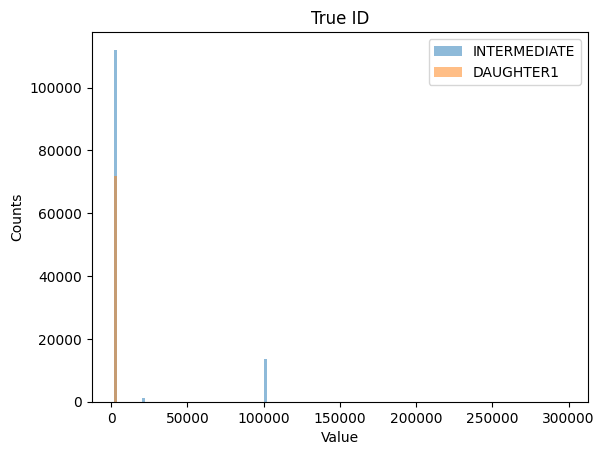

In [46]:
#plt.hist(dft['MOTHER_TRUEID'], bins=bins, alpha=0.5, label='MOTHER', color='orange', rwidth=0.3)
plt.hist(dft['INTERMEDIATE_TRUEID'], bins=bins, alpha=0.5, label='INTERMEDIATE', rwidth=0.3)
plt.hist(dft['DAUGHTER1_TRUEID'], bins=bins, alpha=0.5, label='DAUGHTER1', rwidth=0.3)


plt.title('True ID')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.legend()

plt.show()

In [32]:
def plot_hist(col):
    
    bins = np.linspace(0, 300000, 50) 


    plt.hist(dft[col], bins=bins, alpha=0.5, label='True', color='blue', log=True, rwidth=0.3)
    plt.hist(dfr[col], bins=bins, alpha=0.5, label='Reconstructed', color='orange', rwidth=0.3)

    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Counts')
    plt.legend()

    plt.show()

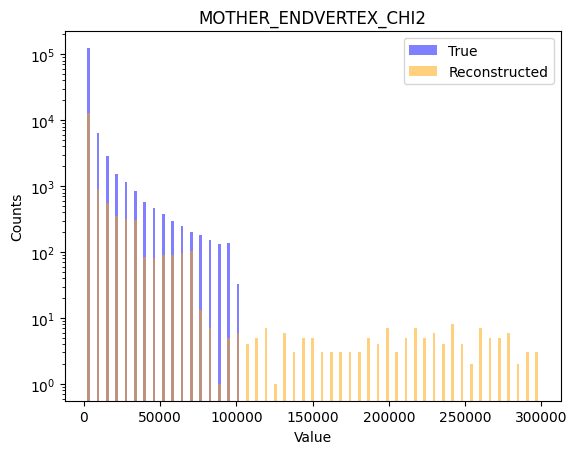

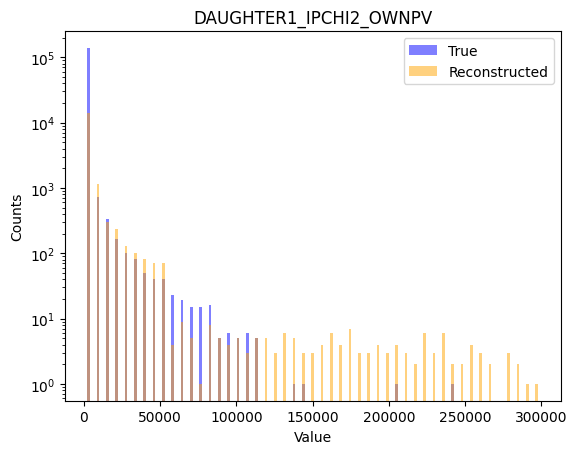

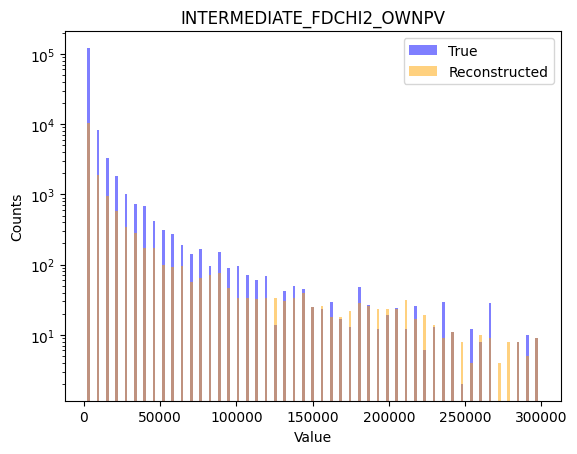

In [35]:
plot_hist('MOTHER_ENDVERTEX_CHI2')
plot_hist('DAUGHTER1_IPCHI2_OWNPV')
plot_hist('DAUGHTER2_IPCHI2_OWNPV')
plot_hist('INTERMEDIATE_FDCHI2_OWNPV')